#functions

#imports and info

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/machine_learning_projects/AdultIncome/AdultIncome/adult.csv')

In [ ]:
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.shape

(48842, 15)

In [ ]:
obj_col = df.select_dtypes(include = object).columns
for col in obj_col:
  print(df[col].value_counts())
  print()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial   

# handelling duplicates

In [ ]:
def remove_duplicates(df):
  '''
  Function that removed duplicates

  parameters:
    df(dataframe)
  '''
  print('number of duplicats = ',df[df.duplicated()==True].shape[0])
  print('assumed numbers of rows remaining = ',df.shape[0] - df[df.duplicated()==True].shape[0])
  df.drop_duplicates(keep = 'first', inplace = True)
  df.reset_index(inplace = True,drop=True)
  print('number of rows after removing the duplicates = ',df.shape[0])

In [ ]:
remove_duplicates(df)

number of duplicats =  52
assumed numbers of rows remaining =  48790
number of rows after removing the duplicates =  48790


#split traing and testing datasets

In [ ]:
train, test  = train_test_split(df, random_state = 41, train_size = 0.8)

In [ ]:
!mkdir /content/drive/MyDrive/machine_learning_projects/AdultIncome/AdultIncome/data

mkdir: cannot create directory ‘/content/drive/MyDrive/machine_learning_projects/AdultIncome/AdultIncome/data’: File exists


In [ ]:
%cd /content/drive/MyDrive/machine_learning_projects/AdultIncome/AdultIncome/data

/content/drive/MyDrive/machine_learning_projects/AdultIncome/AdultIncome/data


In [ ]:
!pwd

/content/drive/MyDrive/machine_learning_projects/AdultIncome/AdultIncome/data


In [ ]:
!mkdir raw raw_split processed feature_selected

mkdir: cannot create directory ‘raw’: File exists
mkdir: cannot create directory ‘raw_split’: File exists
mkdir: cannot create directory ‘processed’: File exists
mkdir: cannot create directory ‘feature_selected’: File exists


In [ ]:
path_of_data = '/content/drive/MyDrive/machine_learning_projects/AdultIncome/AdultIncome-classification/data'
df.to_csv(path_of_data+'/raw/raw.csv',index = False)
train.to_csv(path_of_data+'/raw_split/train.csv', index = False)
test.to_csv(path_of_data+'/raw_split/test.csv', index = False)

In [ ]:
train

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
32729,41,Local-gov,183009,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,40,United-States,>50K
18346,45,Private,371886,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,46,United-States,<=50K
38760,41,Private,152958,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
12165,45,Private,239864,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
20512,24,Private,116934,Some-college,10,Separated,Sales,Unmarried,White,Female,0,0,45,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48597,90,Local-gov,214594,7th-8th,4,Married-civ-spouse,Protective-serv,Husband,White,Male,2653,0,40,United-States,<=50K
41281,27,Private,119793,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
20450,41,Private,84610,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1902,60,United-States,>50K
931,60,Private,266983,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,32,United-States,<=50K


# handelling missing values

In [ ]:
train.replace('?', np.nan, inplace = True)

The attribute’s mean value can be used to replace the missing value when the data is normally distributed

wherein in the case of non-normal distribution median value of the attribute can be used.


In [ ]:
indexes_to_drop = train[(train['native-country'].isna()) & (train['occupation'].isna()) & (train['workclass'].isna())]
len(indexes_to_drop)

36

In [ ]:
indexes_to_drop.index

Index([ 3073, 10407,  2322,  5971, 41602, 18788, 10507, 17428, 42603, 12573,
       48754, 13237, 16337,  2159, 46603,  7230, 42537, 44925, 32747,  2773,
       29259, 40159,  2611, 14368, 33097, 24132, 14198, 39973, 19405, 10265,
       16573,  2583, 36587,  3852,  3670,  5051],
      dtype='int64')

In [ ]:
train.drop(indexes_to_drop.index, inplace = True)

In [ ]:
train.isna().sum()

age                   0
workclass          2205
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2214
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      654
income                0
dtype: int64

In [ ]:
indexes_to_drop = train[(train['occupation'].isna()) & (train['workclass'].isna())]
len(indexes_to_drop)

2205

In [ ]:
train.drop(indexes_to_drop.index, inplace = True)

In [ ]:
train.isna().sum()

age                  0
workclass            0
fnlwgt               0
education            0
educational-num      0
marital-status       0
occupation           9
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     654
income               0
dtype: int64

native-country, occupation, and workclass they are all categorical nominal features

In [ ]:
len(train)

36791

In [ ]:
654/36791*100

1.7776086542904512

1. Mean, mode, or median imputation:
   - Use mean imputation when dealing with continuous variables and the missingness is assumed to be missing at random or missing completely at random.
   - Use mode imputation when dealing with categorical variables or discrete variables with a few distinct values.
   - Use median imputation when the data have outliers or a skewed distribution, making the mean less representative.


In [ ]:
def impute_missing_values(df, impute_method):

  if impute_method['mean']: df[impute_method['mean']] = df[impute_method['mean']].fillna(df.mean().iloc[0])

  if impute_method['mode']: df[impute_method['mode']] = df[impute_method['mode']].fillna(df.mode().iloc[0])

  if impute_method['median']: df[impute_method['median']] = df[impute_method['median']].fillna(df.meadian().iloc[0])



In [ ]:
impute_method = {
    'mean':'',
    'mode':['native-country', 'occupation', 'workclass'],
    'median':''
}
impute_missing_values(train, impute_method)

In [ ]:
train.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

#handelling outliers

In [ ]:
def outliers_handeler_IQR(df,features):
  '''
  Function that handels outliers and put them in a range between the 10th percentile and the 90th percentile

  parameters:
    df(DataFrame)
    features(string)
  '''
  for feature in features:
    tenth_percentile = np.percentile(df[feature],10)
    ninetieth_percentile = np.percentile(df[feature],90)
    b = np.where(df[feature]< tenth_percentile, tenth_percentile, df[feature])
    b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    df[feature] = pd.DataFrame(b)

In [ ]:
features_with_outliers=['age']
outliers_handeler_IQR(train, features_with_outliers)

#new features

In [ ]:
train['education_seg'] = train['education']
train['education_seg'].replace(['HS-grad'], 'HighSchoolGrad',inplace = True)
train['education_seg'].replace(['Some-college','Assoc-acdm','Assoc-voc'], 'CommunityCollege', inplace = True)
train['education_seg'].replace(['7th-8th', '1st-4th', '5th-6th', '9th', 'Preschool'],'SchoolDropout', inplace = True)
train['education_seg'].replace(['10th','11th','12th'],'HighSchoolDropout',inplace = True)
train['education_seg'].replace(['Prof-school', 'Masters'],'Masters',inplace =True)


In [ ]:
train['education_seg'].value_counts()

education_seg
HighSchoolGrad       11995
CommunityCollege     10730
Bachelors             6223
HighSchoolDropout     2821
Masters               2748
SchoolDropout         1814
Doctorate              460
Name: count, dtype: int64

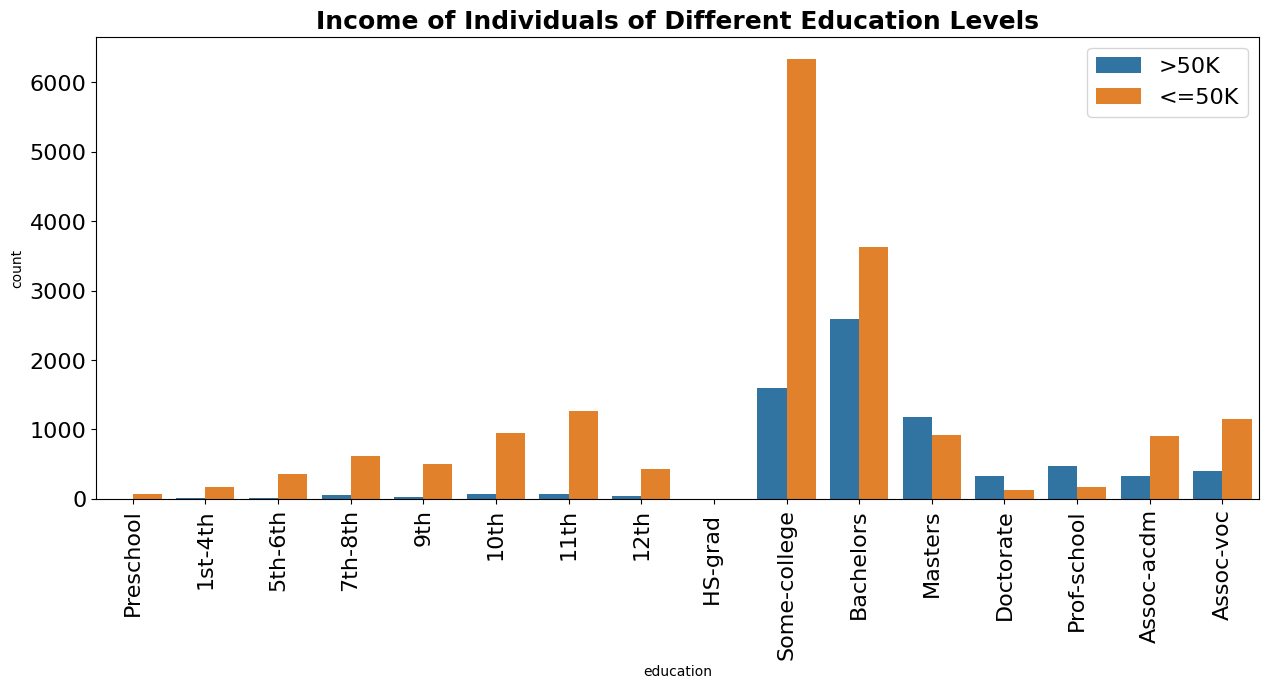

In [ ]:
plt.figure(figsize=(15,6))
order_list = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th',
                'HS-grad ', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school',
              'Assoc-acdm', 'Assoc-voc']
sns.countplot(data = train, hue='income',x='education', order= order_list)
plt.title('Income of Individuals of Different Education Levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [ ]:
train['education'].value_counts()

education
HS-grad         11995
Some-college     7935
Bachelors        6223
Masters          2101
Assoc-voc        1556
11th             1338
Assoc-acdm       1239
10th             1013
7th-8th           662
Prof-school       647
9th               538
12th              470
Doctorate         460
5th-6th           370
1st-4th           180
Preschool          64
Name: count, dtype: int64

In [ ]:
train['education_seg'].value_counts()

education_seg
HighSchoolGrad       11995
CommunityCollege     10730
Bachelors             6223
HighSchoolDropout     2821
Masters               2748
SchoolDropout         1814
Doctorate              460
Name: count, dtype: int64

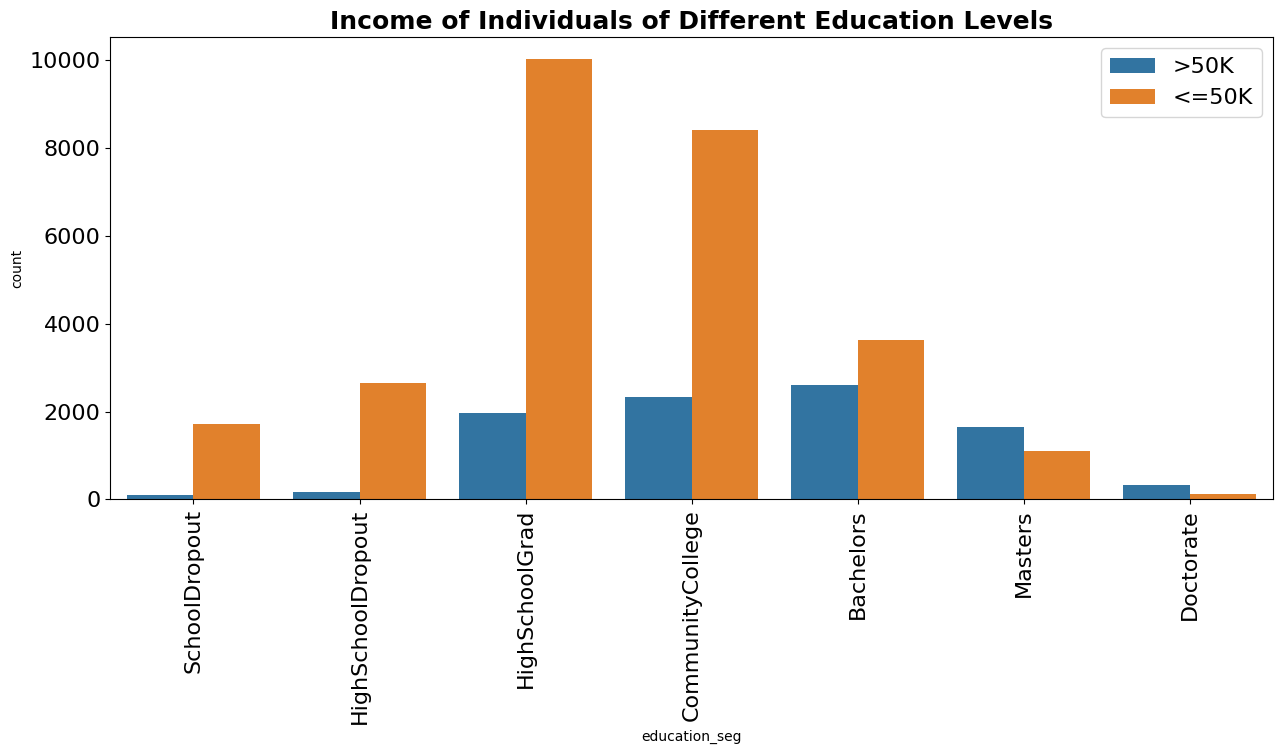

In [ ]:
plt.figure(figsize=(15,6))
order_list = ['SchoolDropout', 'HighSchoolDropout',
                'HighSchoolGrad', 'CommunityCollege', 'Bachelors', 'Masters', 'Doctorate',]
sns.countplot(data = train, hue='income',x='education_seg', order= order_list)
plt.title('Income of Individuals of Different Education Levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

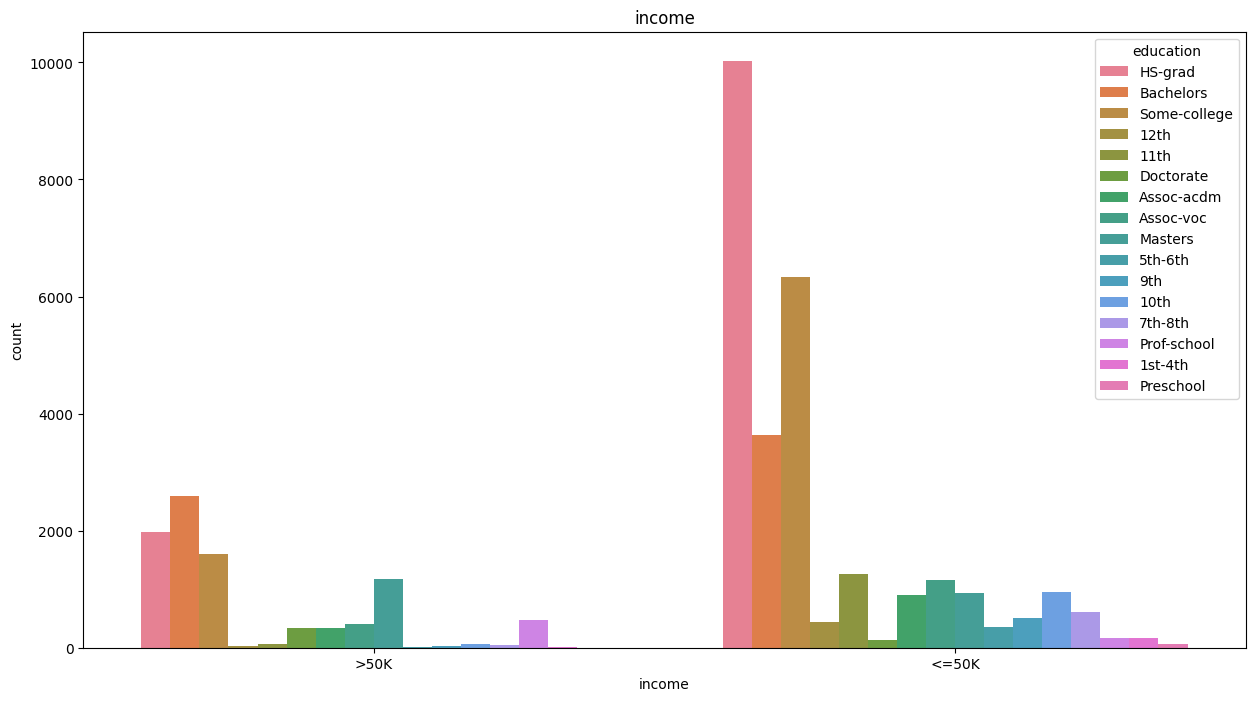

In [ ]:
plt.figure(figsize = (15,8))

plt.title("income")

ax = sns.countplot(data = train, x='income',hue='education')
#make it ito group age

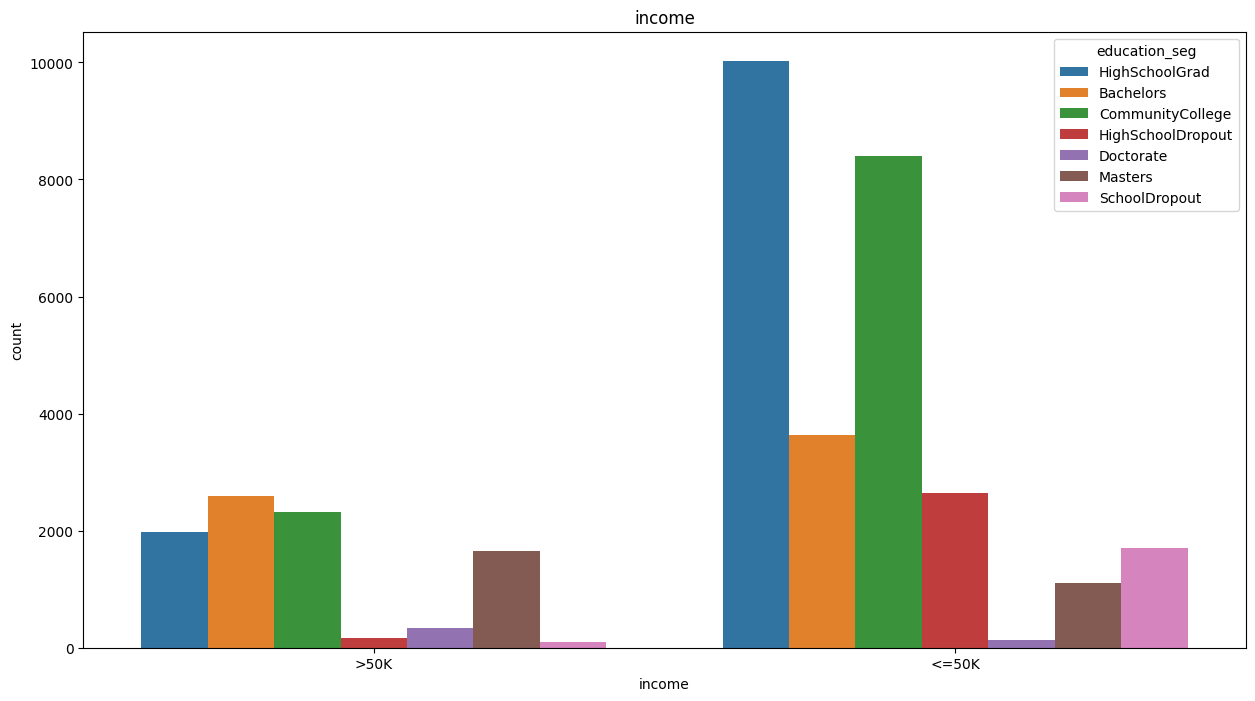

In [ ]:
plt.figure(figsize = (15,8))

plt.title("income")

ax = sns.countplot(data = train, x='income',hue='education_seg')
#make it ito group age

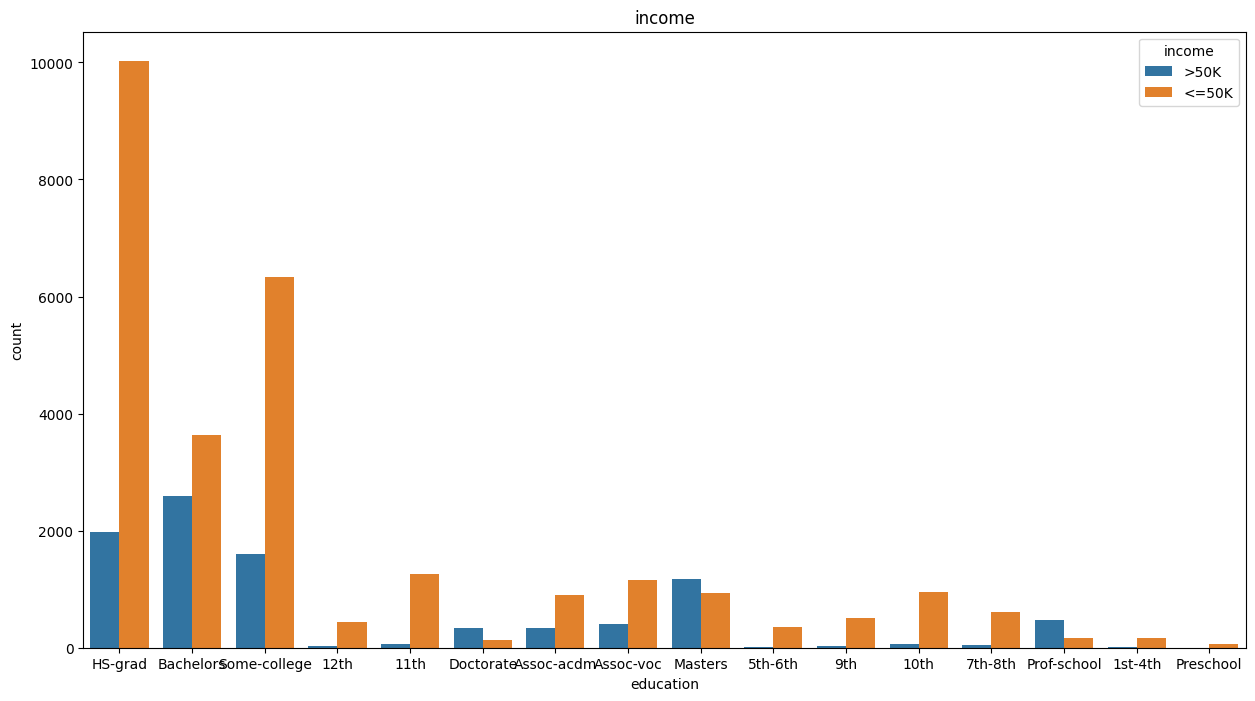

In [ ]:
plt.figure(figsize = (15,8))

plt.title("income")

ax = sns.countplot(data = train, hue='income',x='education')
#make it ito group age

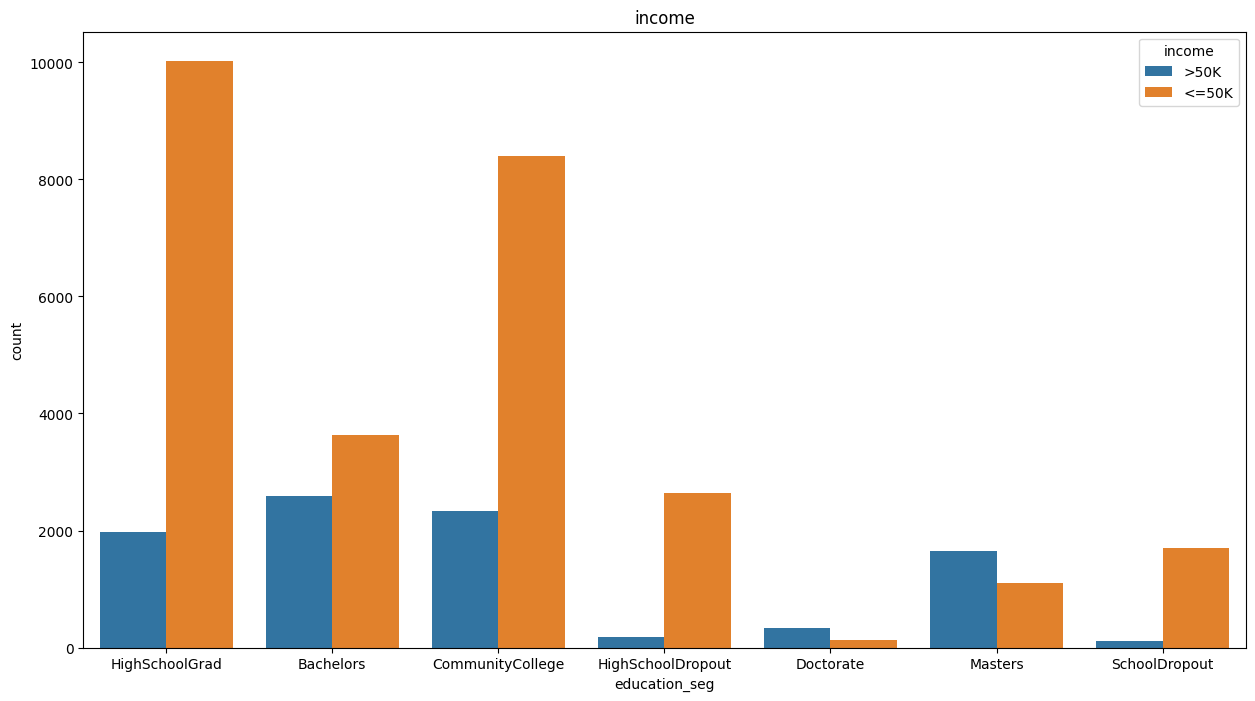

In [ ]:
plt.figure(figsize = (15,8))

plt.title("income")

ax = sns.countplot(data = train, hue='income',x='education_seg')
#make it ito group age

In [ ]:
train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'education_seg'],
      dtype='object')

In [ ]:
#corr_purpose['marital_status'].replace({['Married-spouse-absent','Separated']:'separated',['Married-AF-spouse','Married-civ-spouse']:'married'},inplace = True, errors = 'raise')
train['marital_status_seg'] = train['marital-status']
train['marital_status_seg'].replace(['Married-spouse-absent','Separated'],'Separated', inplace=True)
train['marital_status_seg'].replace(['Married-AF-spouse','Married-civ-spouse'],'married', inplace = True)
#.replace({'Preschool':0,'1st-4th':1,'5th-6t

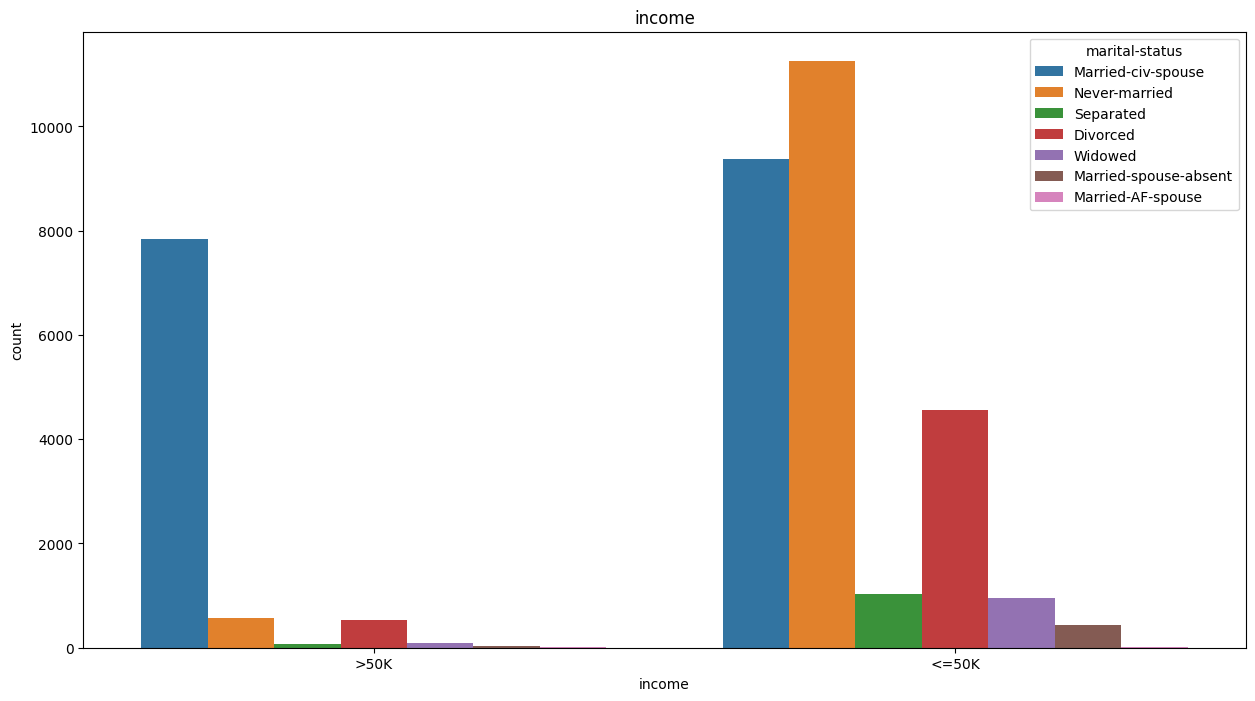

In [ ]:
plt.figure(figsize = (15,8))

plt.title("income")

ax = sns.countplot(data = train, x='income',hue='marital-status')
#make it ito group age

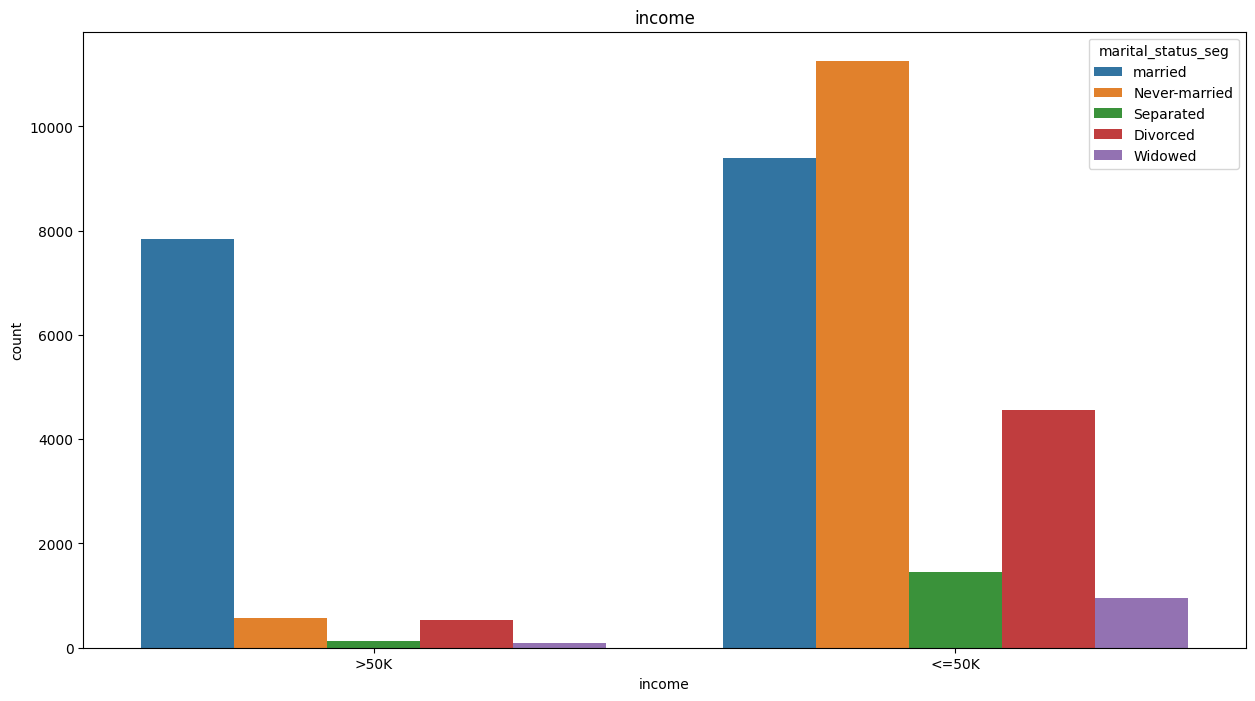

In [ ]:
plt.figure(figsize = (15,8))

plt.title("income")

ax = sns.countplot(data = train, x='income',hue='marital_status_seg')
#make it ito group age

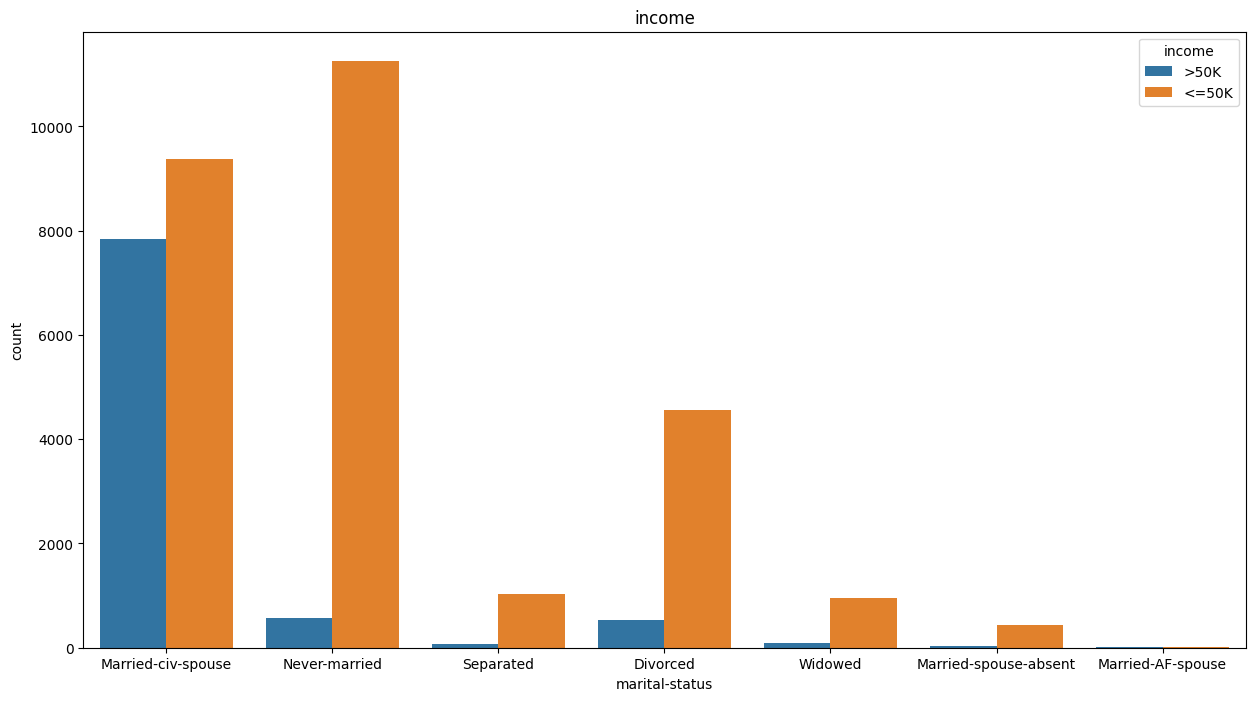

In [ ]:
plt.figure(figsize = (15,8))

plt.title("income")

ax = sns.countplot(data = train, hue='income',x='marital-status')
#make it ito group age

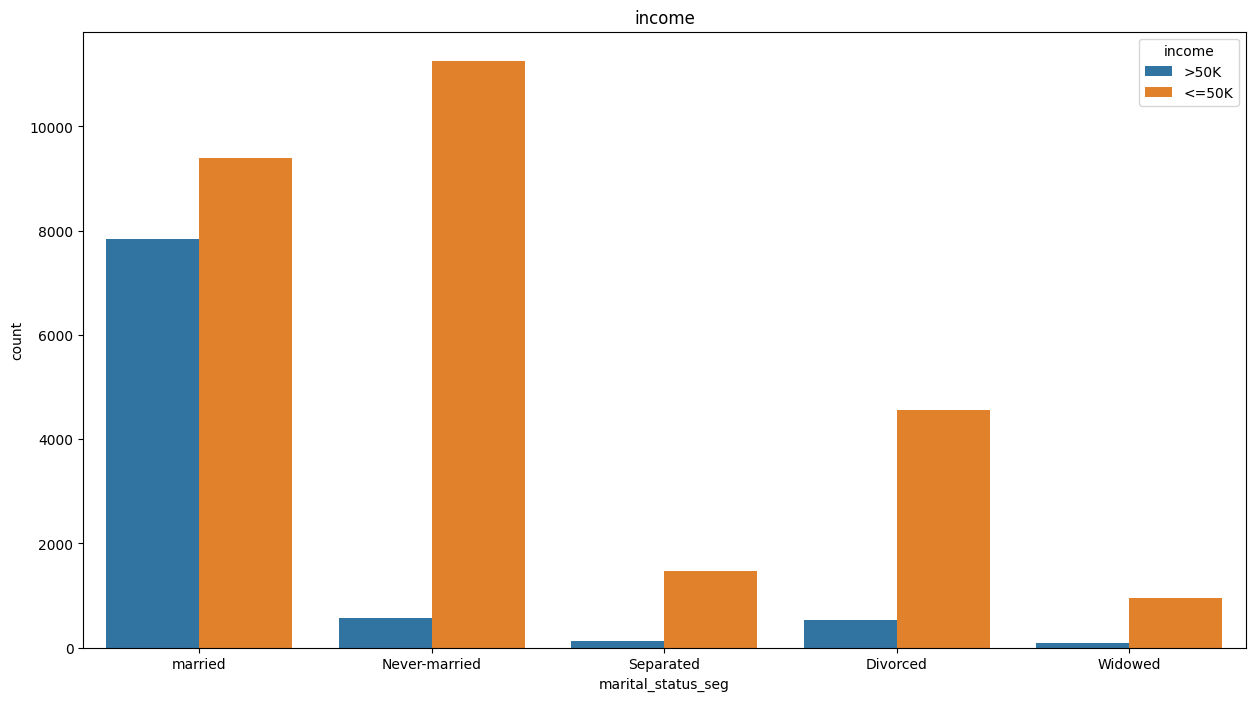

In [ ]:
plt.figure(figsize = (15,8))

plt.title("income")

ax = sns.countplot(data = train, hue='income',x='marital_status_seg')
#make it ito group age

In [ ]:
#hours per week ?

In [ ]:
#country = pd.DataFrame()



In [ ]:
entities_south = train[(train['native-country']=='South')]
len(entities_south)

75

In [ ]:
entities_south

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,education_seg,marital_status_seg
35947,55.0,Private,96483,HS-grad,9,Divorced,Other-service,Own-child,Asian-Pac-Islander,Female,0,0,40,South,<=50K,HighSchoolGrad,Divorced
34446,57.0,Private,119359,Prof-school,15,Married-civ-spouse,Sales,Wife,Amer-Indian-Eskimo,Female,15024,0,40,South,>50K,Masters,married
28847,36.0,Federal-gov,108183,Masters,14,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,1902,40,South,>50K,Masters,married
11771,43.0,Self-emp-inc,137421,HS-grad,9,Married-civ-spouse,Sales,Husband,Asian-Pac-Islander,Male,0,0,45,South,<=50K,HighSchoolGrad,married
43578,NaN,Private,80743,HS-grad,9,Married-civ-spouse,Other-service,Wife,Asian-Pac-Islander,Female,0,0,40,South,<=50K,HighSchoolGrad,married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5505,28.0,Self-emp-inc,153078,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,1887,70,South,>50K,HighSchoolGrad,married
25816,32.0,Self-emp-not-inc,162312,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,66,South,<=50K,HighSchoolGrad,married
26483,34.0,Private,135803,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,15024,0,60,South,>50K,Bachelors,married
25585,35.0,Private,160120,Masters,14,Never-married,Prof-specialty,Unmarried,Asian-Pac-Islander,Male,0,0,40,South,<=50K,Masters,Never-married


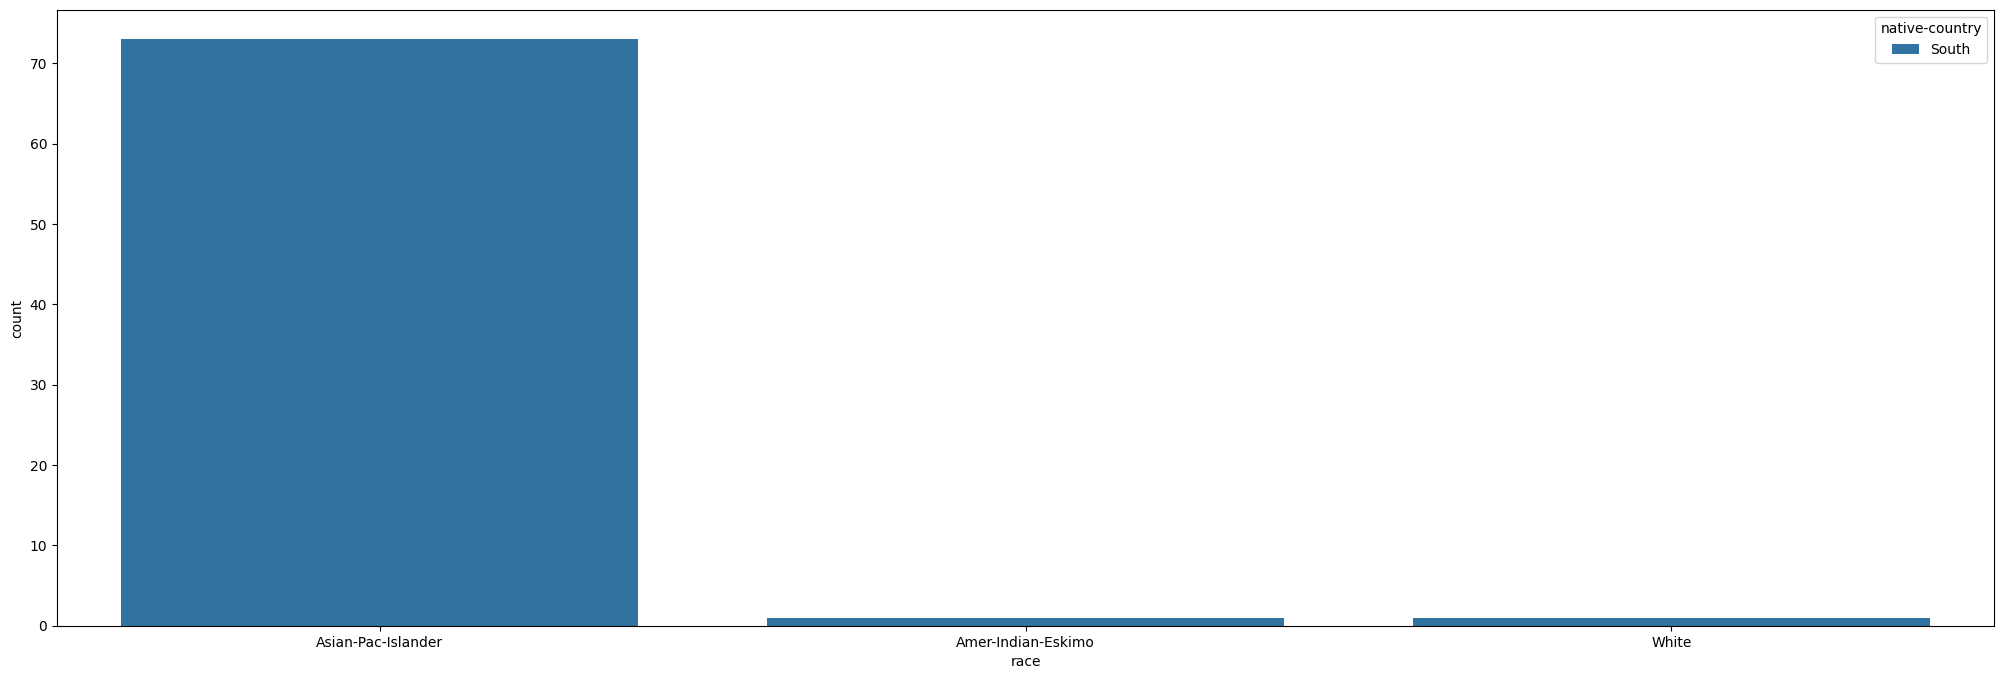

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (25,8))

#plt.title("income")

ax = sns.countplot(data = entities_south, hue='native-country',x='race')
#make it ito group age

The U.S. Department of Labor Office of Federal Contract Compliance Programs defined Asian-Pacific Islander as "A person with origins in any of the original peoples of the Far East (i.e. East and Southeast Asia), Indian subcontinent, or the Pacific Islands.

In [ ]:
entities_TrinadadandTobago = train[(train['native-country']=='Trinadad&Tobago')]
len(entities_TrinadadandTobago)

17

In [ ]:
entities_TrinadadandTobago.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,education_seg,marital_status_seg
13389,31.0,Private,147171,Some-college,10,Married-civ-spouse,Other-service,Wife,Asian-Pac-Islander,Female,0,0,40,Trinadad&Tobago,<=50K,CommunityCollege,married
16137,57.0,Federal-gov,263690,Masters,14,Married-civ-spouse,Other-service,Husband,Black,Male,3137,0,40,Trinadad&Tobago,<=50K,Masters,married
28584,57.0,Private,165232,Some-college,10,Divorced,Tech-support,Not-in-family,Black,Female,0,0,40,Trinadad&Tobago,<=50K,CommunityCollege,Divorced
43546,NaN,Private,137421,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Asian-Pac-Islander,Male,0,0,60,Trinadad&Tobago,<=50K,HighSchoolGrad,married
16131,38.0,Private,237811,Some-college,10,Never-married,Adm-clerical,Unmarried,Black,Female,0,0,40,Trinadad&Tobago,<=50K,CommunityCollege,Never-married


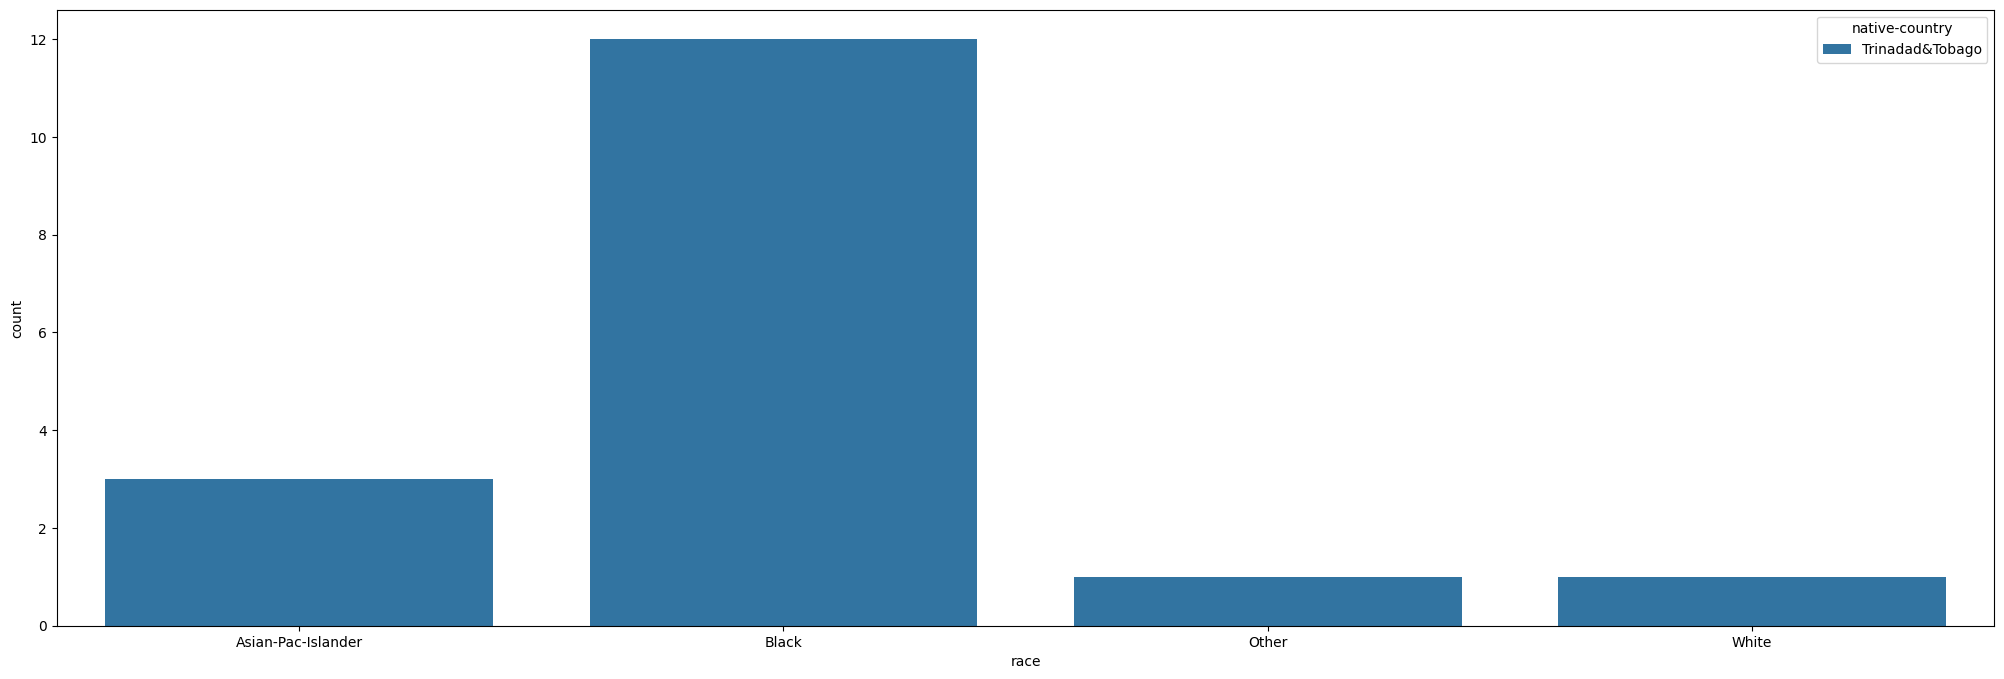

In [ ]:
plt.figure(figsize = (25,8))

#plt.title("income")

ax = sns.countplot(data = entities_TrinadadandTobago, hue='native-country',x='race')
#make it ito group age

Trinidad and Tobago lie on the continental shelf of South America, and are thus geologically considered to lie entirely in South America.

In [ ]:
spare = pd.DataFrame
spare = train.copy()

In [ ]:
spare

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,education_seg,marital_status_seg
32729,22.0,Local-gov,183009,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,40,United-States,>50K,HighSchoolGrad,married
18346,57.0,Private,371886,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,46,United-States,<=50K,Bachelors,Never-married
38760,NaN,Private,152958,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K,HighSchoolGrad,married
12165,57.0,Private,239864,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K,HighSchoolGrad,Never-married
20512,36.0,Private,116934,Some-college,10,Separated,Sales,Unmarried,White,Female,0,0,45,United-States,<=50K,CommunityCollege,Separated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48597,NaN,Local-gov,214594,7th-8th,4,Married-civ-spouse,Protective-serv,Husband,White,Male,2653,0,40,United-States,<=50K,SchoolDropout,married
41281,NaN,Private,119793,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K,Bachelors,married
20450,42.0,Private,84610,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1902,60,United-States,>50K,Bachelors,married
931,57.0,Private,266983,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,32,United-States,<=50K,HighSchoolGrad,married


In [ ]:
#train['continent'] = train['native-country'].copy()
#train['continent'].unique()

array(['United-States', 'Laos', 'Germany', 'Dominican-Republic',
       'Philippines', 'China', 'Taiwan', 'Portugal', 'Columbia', 'Mexico',
       'Poland', 'Cuba', 'Scotland', 'Italy', 'Iran', 'Canada', 'Jamaica',
       'India', 'Guatemala', 'Peru', 'England', 'Japan', 'Puerto-Rico',
       'Greece', 'South', 'Yugoslavia', 'El-Salvador', 'Nicaragua',
       'Cambodia', 'Thailand', 'Haiti', 'Trinadad&Tobago', 'France',
       'Hungary', 'Vietnam', 'Ireland', 'Ecuador', 'Honduras',
       'Outlying-US(Guam-USVI-etc)', 'Hong', 'Holand-Netherlands'],
      dtype=object)

In [ ]:
train['native-country'].unique()

array(['United-States', 'Laos', 'Germany', 'Dominican-Republic',
       'Philippines', 'China', 'Taiwan', 'Portugal', 'Columbia', 'Mexico',
       'Poland', 'Cuba', 'Scotland', 'Italy', 'Iran', 'Canada', 'Jamaica',
       'India', 'Guatemala', 'Peru', 'England', 'Japan', 'Puerto-Rico',
       'Greece', 'South', 'Yugoslavia', 'El-Salvador', 'Nicaragua',
       'Cambodia', 'Thailand', 'Haiti', 'Trinadad&Tobago', 'France',
       'Hungary', 'Vietnam', 'Ireland', 'Ecuador', 'Honduras',
       'Outlying-US(Guam-USVI-etc)', 'Hong', 'Holand-Netherlands'],
      dtype=object)

In [ ]:
train

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,education_seg,marital_status_seg,continent
32729,22.0,Local-gov,183009,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,40,United-States,>50K,HighSchoolGrad,married,United-States
18346,57.0,Private,371886,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,46,United-States,<=50K,Bachelors,Never-married,United-States
38760,NaN,Private,152958,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K,HighSchoolGrad,married,United-States
12165,57.0,Private,239864,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K,HighSchoolGrad,Never-married,United-States
20512,36.0,Private,116934,Some-college,10,Separated,Sales,Unmarried,White,Female,0,0,45,United-States,<=50K,CommunityCollege,Separated,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48597,NaN,Local-gov,214594,7th-8th,4,Married-civ-spouse,Protective-serv,Husband,White,Male,2653,0,40,United-States,<=50K,SchoolDropout,married,United-States
41281,NaN,Private,119793,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K,Bachelors,married,United-States
20450,42.0,Private,84610,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1902,60,United-States,>50K,Bachelors,married,United-States
931,57.0,Private,266983,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,32,United-States,<=50K,HighSchoolGrad,married,United-States


In [ ]:
train = spare.copy()

In [ ]:
train['native-country'].value_counts()

native-country
United-States                 33676
Mexico                          698
Philippines                     224
Germany                         144
Puerto-Rico                     141
Canada                          127
El-Salvador                     123
India                           123
Cuba                            107
England                          98
China                            95
Italy                            84
Jamaica                          82
Dominican-Republic               77
South                            75
Japan                            70
Guatemala                        70
Vietnam                          67
Poland                           66
Columbia                         60
Haiti                            57
Portugal                         48
Taiwan                           46
Iran                             44
Greece                           43
Peru                             36
Ecuador                          33
Nicaragua    

In [ ]:
!pip install pycountry_convert
#!pip install a-world-of-countries

In [ ]:
train['native-country'].values

array(['United-States', 'United-States', 'United-States', ...,
       'United-States', 'United-States', 'United-States'], dtype=object)

In [ ]:
#change native county into continent?
import pycountry_convert as pc
def country_to_continent(df, col):
  con = train[col].values.copy()
  odd_countries = {
    "South": "AS",
    "Columbia": "SA",
    "England":'EU' ,
    "Scotland": 'EU',
    "Yugoslavia": 'EU',
    "Trinadad&Tobago": 'SA' ,
    "Outlying-US(Guam-USVI-etc)": 'NA' ,
    "Hong": 'AS',
    "Holand-Netherlands": 'EU'
  }
  for i,country in enumerate (con):
    if country not in ['South', 'Columbia', 'England', 'Scotland', 'Yugoslavia', 'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'Hong', 'Holand-Netherlands']:
      country_code = pc.country_name_to_country_alpha2(country.replace("-"," "), cn_name_format = 'default')
      continent_name = pc.country_alpha2_to_continent_code(country_code)
      con[i] = continent_name
      #print(i,' ',con[i])
    else:
      con[i] = odd_countries[country]
      #print(i,' ',con[i])

  train['continent'] = con


In [ ]:
train = spare.copy()
country_to_continent(train, 'native-country')

In [ ]:
train

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,education_seg,marital_status_seg,continent
32729,22.0,Local-gov,183009,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,40,United-States,>50K,HighSchoolGrad,married,NA
18346,57.0,Private,371886,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,46,United-States,<=50K,Bachelors,Never-married,NA
38760,NaN,Private,152958,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K,HighSchoolGrad,married,NA
12165,57.0,Private,239864,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K,HighSchoolGrad,Never-married,NA
20512,36.0,Private,116934,Some-college,10,Separated,Sales,Unmarried,White,Female,0,0,45,United-States,<=50K,CommunityCollege,Separated,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48597,NaN,Local-gov,214594,7th-8th,4,Married-civ-spouse,Protective-serv,Husband,White,Male,2653,0,40,United-States,<=50K,SchoolDropout,married,NA
41281,NaN,Private,119793,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K,Bachelors,married,NA
20450,42.0,Private,84610,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1902,60,United-States,>50K,Bachelors,married,NA
931,57.0,Private,266983,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,32,United-States,<=50K,HighSchoolGrad,married,NA


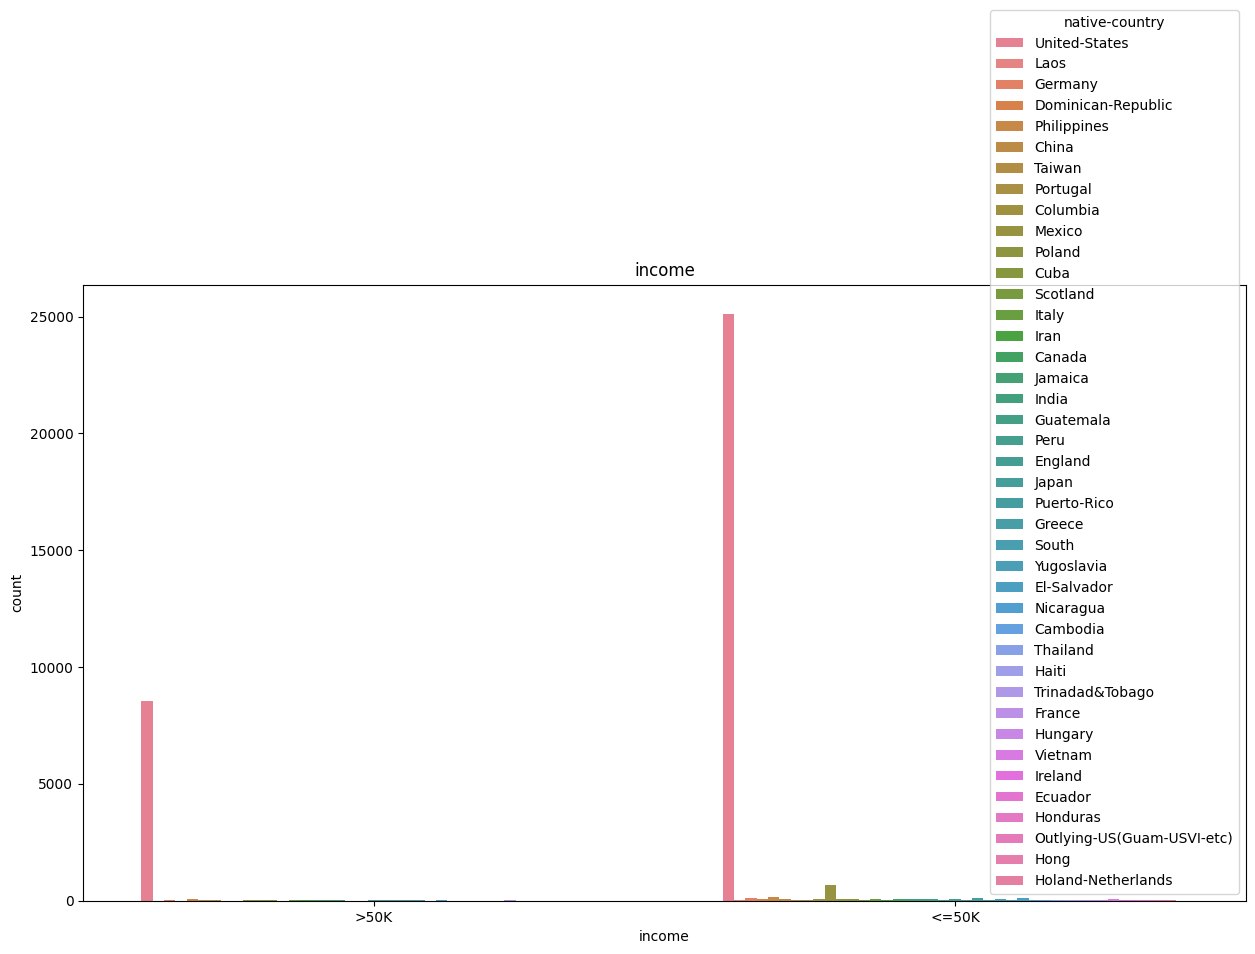

In [ ]:
plt.figure(figsize = (15,8))

plt.title("income")

ax = sns.countplot(data = train, x='income',hue='native-country')
#make it ito group age

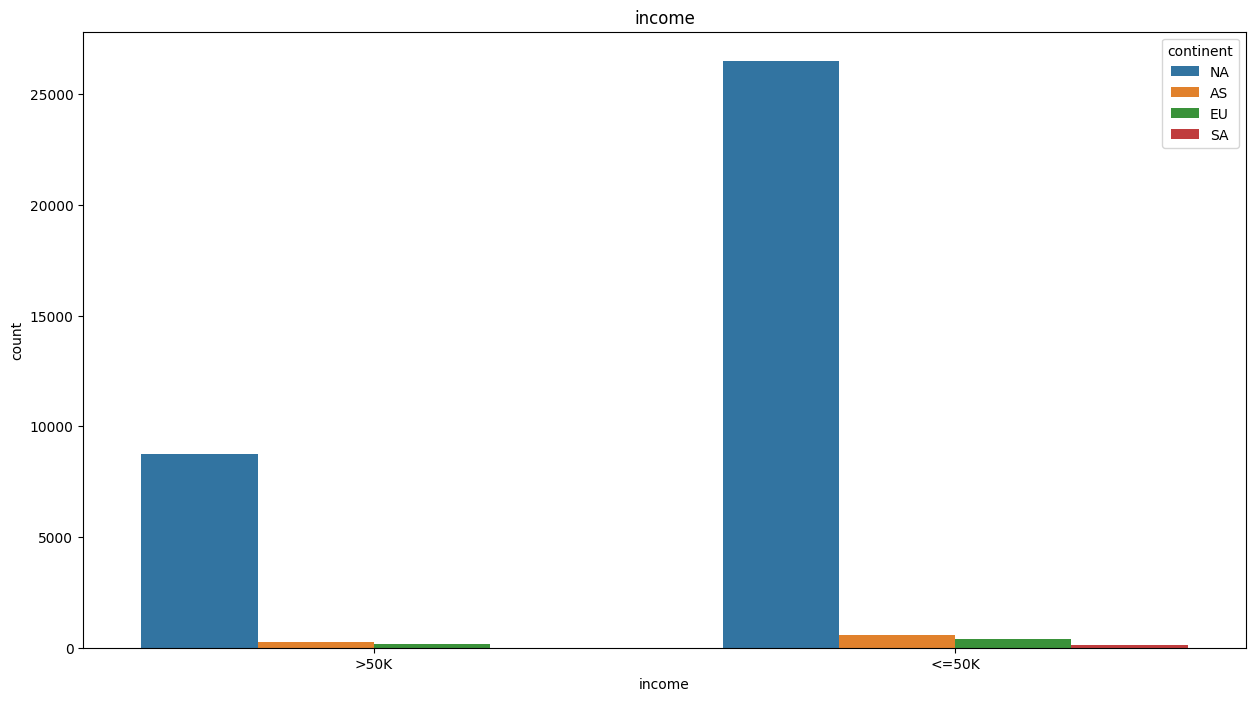

In [ ]:
plt.figure(figsize = (15,8))

plt.title("income")

ax = sns.countplot(data = train, x='income',hue='continent')
#make it ito group age

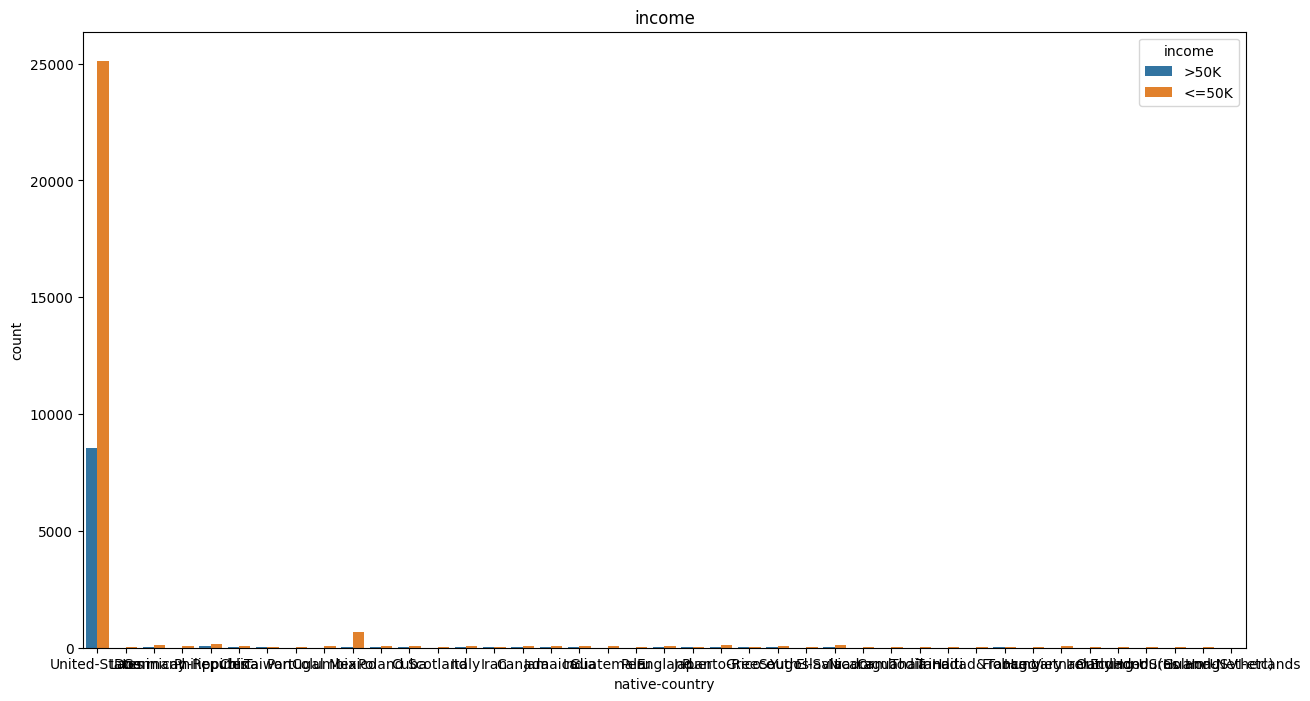

In [ ]:
plt.figure(figsize = (15,8))

plt.title("income")

ax = sns.countplot(data = train, hue='income',x='native-country')
#make it ito group age

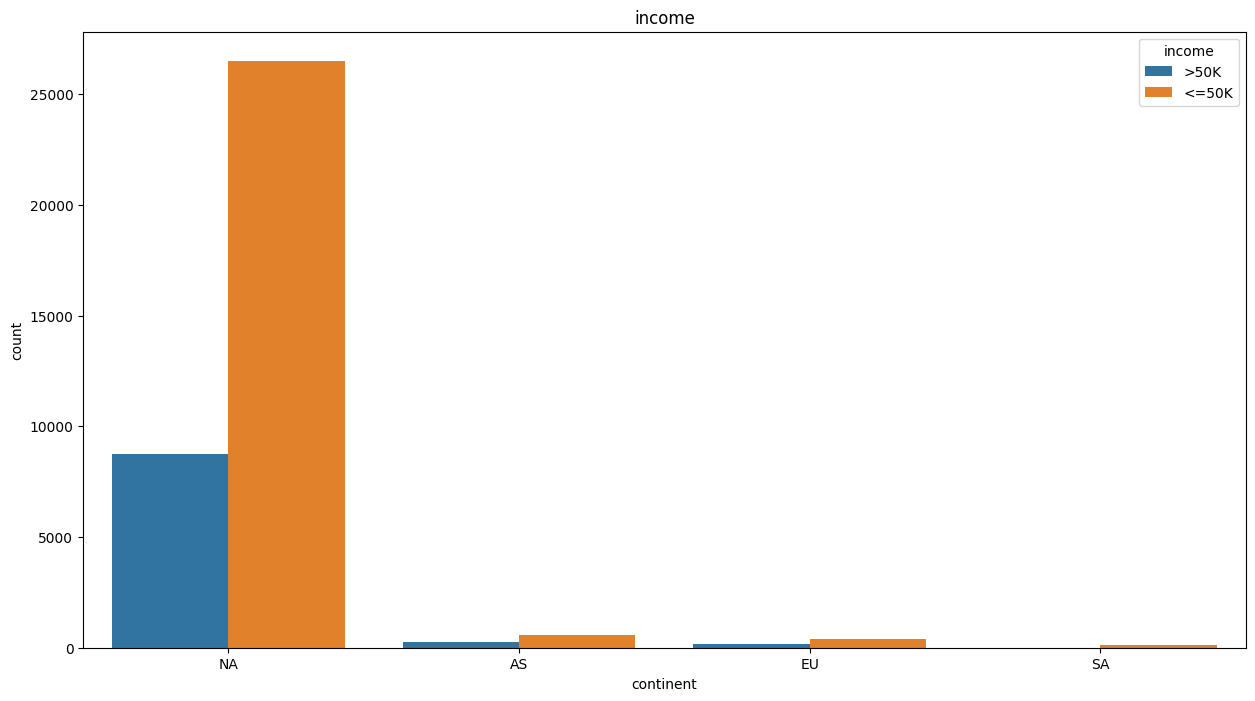

In [ ]:
plt.figure(figsize = (15,8))

plt.title("income")

ax = sns.countplot(data = train, hue='income',x='continent')
#make it ito group age

workclass - occupation - race - gender- income - education-seg - marital-status-seg - contenent

In [ ]:
train['education_seg'].unique()

array(['HighSchoolGrad', 'Bachelors', 'CommunityCollege',
       'HighSchoolDropout', 'Doctorate', 'Masters', 'SchoolDropout'],
      dtype=object)

categorical features [workclass, education, marital status, marriedcivspouse, occupation, relationship, race, sex, nativecountry,]

nominal [workclass, marital status, mariescivspouse, occupation, realationship, race, sex, nativecountry, income]

ordinal [education ]

label(categorical)

# feature encoding

replace --> gender - income - education - marital_status_seg

one-hot encoded --> workclass - occupation - race - contenent

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
for col in train.select_dtypes(include = object).columns:
  print(col," ", train[col].unique(),'\n')



In [ ]:
def label_encoding(df,feature,categories):
  '''
  Funciton that label encode a feature accordning to specific order

  Parameters:
    df(dataframe)
    feature(string)
    categories(list): a lsit of the categories in the received feature that wil be replaced in the same order
  '''
  for i,cat in enumerate (categories):
    df[feature].replace({cat:i},inplace = True)

In [ ]:
order = ['<=50K', '>50K']
label_encoding(train, 'income', order)

categorical features [workclass, education, marital status, marriedcivspouse, occupation, relationship, race, sex, nativecountry,]

nominal [workclass, marital status, mariescivspouse, occupation, realationship, race, sex, nativecountry, income]

ordinal [education ]

label(categorical)

In [ ]:
train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'education_seg', 'marital_status_seg', 'continent'],
      dtype='object')

In [ ]:
train.select_dtypes(include = object).columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income',
       'education_seg', 'marital_status_seg', 'continent'],
      dtype='object')

nominal []

ordinal features

In [ ]:
order = ['SchoolDropout', 'HighSchoolDropout','HighSchoolGrad','CommunityCollege','Masters']
label_encoding(train, 'education_seg', order)

In [ ]:
order = ['Never-married','married',  'Separated', 'Divorced', 'Widowed']
label_encoding(train, 'marital_status_seg', order)

nominal features

In [ ]:
order = ['Male', 'Female']
label_encoding(train, 'gender', order)

In [ ]:
train = pd.get_dummies(train, columns = ['workclass', 'occupation','race','continent','relationship'])


In [ ]:
#train.drop(columns = ['education', 'education-num','marital-status',])

,age,fnlwgt,education,educational-num,marital-status,gender,capital-gain,capital-loss,hours-per-week,income,...,continent_AS,continent_EU,continent_NA,continent_SA,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
32729,22.0,183009,HS-grad,9,Married-civ-spouse,0,0,0,40,0,...,0,0,1,0,1,0,0,0,0,0
18346,57.0,371886,Bachelors,13,Never-married,0,0,0,46,1,...,0,0,1,0,0,1,0,0,0,0
38760,NaN,152958,HS-grad,9,Married-civ-spouse,0,0,0,40,0,...,0,0,1,0,1,0,0,0,0,0
12165,57.0,239864,HS-grad,9,Never-married,0,0,0,40,1,...,0,0,1,0,0,0,0,1,0,0
20512,36.0,116934,Some-college,10,Separated,1,0,0,45,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48597,NaN,214594,7th-8th,4,Married-civ-spouse,0,2653,0,40,1,...,0,0,1,0,1,0,0,0,0,0
41281,NaN,119793,Bachelors,13,Married-civ-spouse,0,0,0,40,1,...,0,0,1,0,1,0,0,0,0,0
20450,42.0,84610,Bachelors,13,Married-civ-spouse,0,0,1902,60,0,...,0,0,1,0,1,0,0,0,0,0
931,57.0,266983,HS-grad,9,Married-civ-spouse,0,0,0,32,1,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
label

#standerdization and normalization

- age                 0.557580
- fnlwgt              1.438892
- educational-num    -0.316525
-capital-gain       11.894659
-capital-loss        4.569809
-hours-per-week      0.238750
-----
- features that are highly positively skewed (skewness >1) are  ['fnlwgt', 'capital-gain', 'capital-loss']
-features that are highly negatively skewed (skewness <-1) are  []
-features that are moderately positively skewed (0.5 < skewness < 1 ) are  ['age']
-features that are moderately negatively skewed (-0.5 < skewness < -1 ) are  []
-features that are normally distributed (-0.5 < skewness < 0.5 ) are ['educational-num', 'hours-per-week']

# saving processed training dataset

In [ ]:
train.csv(path_of_data+'/processed/noSampling/processed.csv', index=False)

#handel unbalenced data

In [ ]:
X = train.drop(columns=['income'])
y = train['income']

TomekLinks

In [ ]:
#https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/
from collections import Counter
from imblearn.under_sampling import TomekLinks

t1 = TomekLinks()

X_t1, y_t1 = t1.fit_resample(X, y)

print('original dataset shape', Counter(y))
print('resample dataset shape', Counter(y_t1))

In [ ]:
train = pd.concate([X_t1, y_t1], axis = 0, join='outer')

In [ ]:
train.csv(path_of_data+'/processed/TomekLinksUnderSampling/TomekLinksUnderSampling.csv', index=False)

SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_smote, y_smote = smote.fit_resample(X, y)

print('original dataset shape', Counter(y))
print('resample dataset shape', Counter(y_smote))

In [ ]:
train = pd.concate([X_smote, y_smote], axis = 0, join='outer')

In [ ]:
train.csv(path_of_data+'/processed/smoteOverSampling/smoteOverSampling.csv', index=False)